# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

In [4]:
city_data = []

# Print to logger
print("Started processing cities")
print("-----------------------------")

for city in cities:
    target_url = url + weather_api_key + "&q=" + city
    print(target_url)
    try:
        city_weather = requests.get(target_url).json()
        city_country = city_weather['sys']['country']
        city_lon = city_weather['coord']['lon']
        city_lat = city_weather['coord']['lat']
        city_id = city_weather["id"]
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"City":city,
                      "Country":city_country,
                      "Longitude":city_lon,
                      "Latitude":city_lat,
                      "City ID":city_id,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    except:
        print("Record not found")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Done processing cities")

Started processing cities
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=grand river south east
Record not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=farah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=tagab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=sibolga
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=cocorit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=norrtalje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=zamosc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=horsham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=wulanhaote
Record not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=lake charles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=dawei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=careiro da varzea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e28

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=isiolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=leopoldov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=buta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=sheltozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=kamenskoye
Record not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f24

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=kadykchan
Record not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=rudsar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=uthal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=palmas bellas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=powell river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=charagua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b3

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=ibague
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=rapid valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=amga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=mukdahan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=yarovoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=ploemeur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=sapan

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=spirit river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=azua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=pangai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=andilamena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=den

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=duz
Record not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=kapoeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=grand forks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d84c866f2407&q=yershov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b38ce2e283b7108ca1d8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#creating a dataframe
city_df = pd.DataFrame(city_data)

# re arranging the columns in data frame 
city_df = city_df [["City","Country","City ID","Cloudiness","Humidity","Longitude","Latitude","Max Temp","Wind Speed"]]
city_df.head()

,City,Country,City ID,Cloudiness,Humidity,Longitude,Latitude,Max Temp,Wind Speed
0,farah,AF,1142263,0,23,62.50,32.50,74.05,2.37
1,tagab,AF,1123424,40,52,69.65,34.85,75.20,0.51
2,yellowknife,CA,6185377,90,88,-114.35,62.46,64.40,3.36
3,namibe,AO,3347019,1,89,12.15,-15.20,62.01,3.18
4,ushuaia,AR,3833367,75,74,-68.30,-54.80,37.40,4.52


## Latitude vs. Temperature Plot

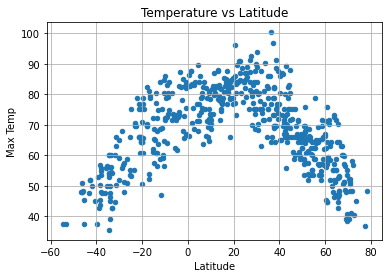

In [24]:
## Temperature vs Latitude
#plt.scatter(city_df['Latitude'],city_df['Max Temp'],)
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Temperature vs Latitude",grid = True)

# save the figure 
plt.savefig("output_data/Temperature vs Latitude.png")

# Display the plot 
plt.show()

## Humidity vs. latitude

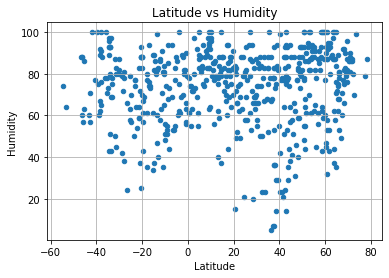

In [25]:
## Humidity VS latitude
city_df.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = True)
# save the figure 
plt.savefig("output_data/Humidity vs Latitude.png")
# Display the plot 
plt.show()

## Cloudiness vs. latitude

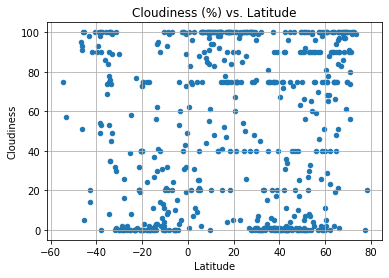

In [26]:
# Cloudiness (%) VS Latitude
city_df.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = True)

# save the figure 
plt.savefig("output_data/Cloudiness VS Latitude.png")

# Display the plot 
plt.show()

## Wind Speed vs. latitude

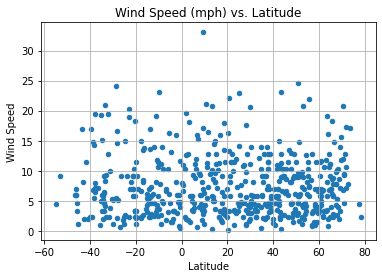

In [27]:
# Wind Speed (mph) vs. Latitude
city_df.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = True) 

# Save the figure
plt.savefig("output_data/Wind Speed VS Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [28]:
# save the Dataframe to csv file 
city_df.to_csv(output_data_file,index_label ="city_id")

cities = pd.read_csv("output_data/cities.csv", encoding="utf-8")

In [30]:
nothern = cities.loc[cities["Latitude"] >= 0.0]
nothern.reset_index(inplace=True)

southern = cities.loc[cities["Latitude"] < 0.0]
southern.reset_index(inplace=True)

In [31]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlabel,ylabel,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7397769589742256


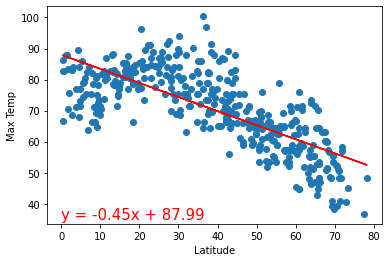

In [32]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlabel = "Latitude"
ylabel = "Max Temp"
lblpos = (0,35)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.791769816717972


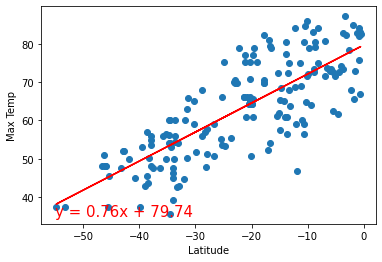

In [33]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

xlabel = "Latitude"
ylabel = "Max Temp"
lblpos = (-55,35)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01581768157256917


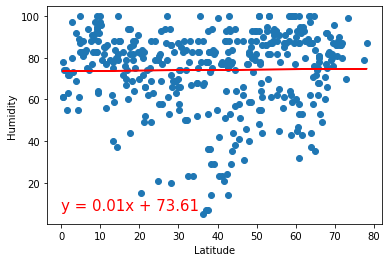

In [34]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Latitude"
ylabel = "Humidity"
lblpos = (0,7)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.1130463173999727


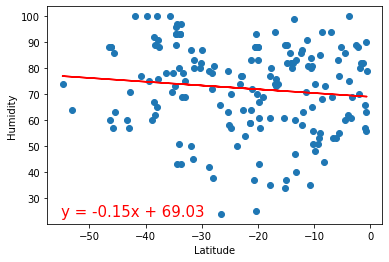

In [35]:
# southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Latitude"
ylabel = "Humidity"
lblpos = (-55,23)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0460563585982046


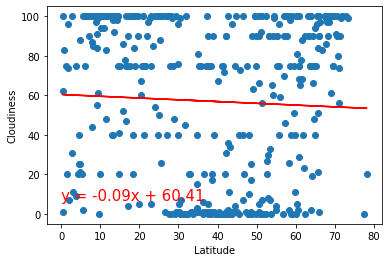

In [36]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Latitude"
ylabel = "Cloudiness"
lblpos = (0,7)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.3159286554286039


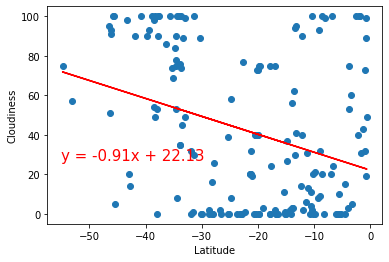

In [37]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Latitude"
ylabel = "Cloudiness"
lblpos = (-55,27)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03859737737320851


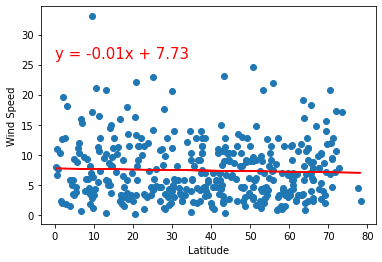

In [38]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

xlabel = "Latitude"
ylabel = "Wind Speed"
lblpos = (0,26)
plotLinearRegression(nothern[xlabel],nothern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07817985100044737


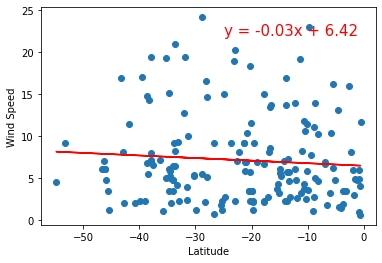

In [39]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

xlabel = "Latitude"
ylabel = "Wind Speed"
lblpos = (-25,22)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos)
plt.show()

####  Observable trends:

1.	Maximum temperature versus latitude plot clearly indicates that places closer to the equator experience extreme temperatures,  we we move away from the equator, temperature also decreases.

2.	Max temp versus northern hemisphere shows a high negative correlation, suggesting that places in higher latitude, experience drop in the maximum temperature. It seems that there is no correlation between humidity and latitude.


3.	Wind speed seems to be higher near arctic and antarctic. There is very little correlation between wind speed and latitude.
